# Text Representation

In [50]:
import pandas as pd

In [51]:
# Fetch preprocessed data
model_data = pd.read_csv("data/keywords.csv")
model_data.head()

,Id,Name,Authors,PublishYear,Publisher,Description,Rating,pagesNumber,keywords,features
0,1100003,the prince,niccolò_machiavelli,1998,university_of_chicago_press,the most famous book on politics ever written ...,3.82,151,machiavellis machiavelli prince tyranny biblio...,niccolò_machiavelli 1998 university_of_chicago...
1,1100004,"sermons from duke chapel: voices from ""a great...",william_h._willimon,2005,duke_university_press_books,many of america’s greatest protestant preacher...,4.29,384,sermons sermon preacher pulpit preachers,william_h._willimon 2005 duke_university_press...
2,1100009,the idea of a university,john_henry_newman,1996,yale_university_press,since its publication almost 150 years ago the...,4.12,400,scholars universities university academic newman,john_henry_newman 1996 yale_university_press 4...
3,1100010,caring and curing: health and medicine in the ...,ronald_l._numbers,1997,johns_hopkins_university_press,most religious traditions have a rich if large...,3.00,622,judeochristian medicine religious religion med...,ronald_l._numbers 1997 johns_hopkins_universit...
4,1100013,the alamo remembered: tejano accounts and pers...,timothy_matovina,1995,university_of_texas_press,as mexican soldiers fought the mostly angloame...,3.77,146,alamo tejanos 1836 tejano antonians,timothy_matovina 1995 university_of_texas_pres...


---
### Vectorize the keywords summary using TF-IDF
- Convert the keywords for each book into a numeric vector, based on the frequency of each word in the book's keywords
- Keep token pattern such that tokens with underscore are not ignored.
- Remove tokens occuring less than 3 times or occur in more than 60% of the documents (common tokens).
- Remove english language stop words

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(analyzer = 'word',
                        min_df=3,
                        max_df = 0.6,
                        stop_words="english",
                        encoding = 'utf-8', 
                        token_pattern=r"(?u)\S\S+")
tfidf_encoding = tfidf.fit_transform(model_data["keywords"])

In [53]:
# Preview first 100 words in the vocabulary
print(tfidf.get_feature_names_out()[1:100])

['books' 'buddhism' 'budo' 'burke' 'church' 'coast' 'detective' 'duras'
 'elephant' 'fiction' 'judo' 'literature' 'martial' 'mrs' 'novel'
 'photographs' 'poems' 'poet' 'poetry' 'poets' 'poirot' 'published'
 'recipes' 'revolutionary' 'routledge' 'tales' 'une' 'verse' 'woman']


In [54]:
# Lets find representation of a new book's keywords in the existing vocabulary space
tfidf.transform(["looking for alaska by john green"]).toarray()[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [55]:
tfidf_encoding.toarray().shape

(200, 30)

---
### Visualize the TF-IDF word embeddings

In [56]:
tfidf_df = pd.DataFrame(tfidf_encoding.toarray(), index=model_data["Name"], columns=tfidf.get_feature_names_out())

In [57]:
# Find top 50 books with maximum tf-idf total score
tfidf_df["total"]= tfidf_df.sum(axis=1)
tfidf_df = tfidf_df.sort_values("total", ascending=False)
del tfidf_df["total"]
tfidf_df.head()


,book,books,buddhism,budo,burke,church,coast,detective,duras,elephant,...,poets,poirot,published,recipes,revolutionary,routledge,tales,une,verse,woman
Name,,,,,,,,,,,,,,,,,,,,,
classical budo,0.0,0.000000,0.5,0.50000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
selected poems and translations: 1969-1991,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.491069,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
budo mind and body: training secrets of the japanese martial arts,0.0,0.000000,0.0,0.57735,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
budo secrets: teachings of the martial arts masters,0.0,0.000000,0.0,0.57735,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"the language of recovery: a blue mountain arts collection (""language of ... "" series)",0.0,0.560084,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.560084,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
len(tfidf_df)

200

In [59]:
# Leave first few words containing years and select top 50 books
tfidf_df_preview = tfidf_df.iloc[:50].copy()
tfidf_df_preview = tfidf_df_preview.stack().reset_index()
tfidf_df_preview = tfidf_df_preview.rename(columns={0:'tfidf', 'Name': 'book','level_1': 'term'})

tfidf_df_preview

,book,term,tfidf
0,classical budo,book,0.0
1,classical budo,books,0.0
2,classical budo,buddhism,0.5
3,classical budo,budo,0.5
4,classical budo,burke,0.0
...,...,...,...
1495,the wonderful thing about hiccups,routledge,0.0
1496,the wonderful thing about hiccups,tales,0.0
1497,the wonderful thing about hiccups,une,0.0
1498,the wonderful thing about hiccups,verse,0.0


In [60]:

tfidf_df_preview = tfidf_df_preview.sort_values(by=['book','tfidf'], ascending=[True,False]).groupby(['book']).head(10)
display(tfidf_df_preview)

,book,term,tfidf
833,a bowl of red,recipes,1.0
810,a bowl of red,book,0.0
811,a bowl of red,books,0.0
812,a bowl of red,buddhism,0.0
813,a bowl of red,budo,0.0
...,...,...,...
1475,the wonderful thing about hiccups,church,0.0
1476,the wonderful thing about hiccups,coast,0.0
1477,the wonderful thing about hiccups,detective,0.0
1478,the wonderful thing about hiccups,duras,0.0


In [61]:
# Find books with term "london"
tfidf_df_preview[tfidf_df_preview['term'].str.contains('church')]

,book,term,tfidf
815,a bowl of red,church,0.0
1385,a vindication of natural society,church,0.0
185,a woman of no importance,church,0.0
1325,amelia earhart: aviation pioneer,church,0.0
1175,beyond the rainbow: the land where imaginary a...,church,0.0
65,budo mind and body: training secrets of the ja...,church,0.0
95,budo secrets: teachings of the martial arts ma...,church,0.0
575,carolina ghost woods: poems,church,0.0
1085,celtic heritage: ancient tradition in ireland ...,church,0.0
665,"changing light at sandover, the: a poem",church,0.0


In [62]:
# Find book names with word mystery
tfidf_df_preview[tfidf_df_preview['book'].str.contains('coast')].head(5)

,book,term,tfidf
1026,coast,coast,1.0
1020,coast,book,0.0
1021,coast,books,0.0
1022,coast,buddhism,0.0
1023,coast,budo,0.0


In [63]:
def process_word_matrix(word_vec):
    # Remove underscores in terms
    word_vec.term = word_vec.term.str.replace('_',' ')

    # Remove terms with zero tfidf score
    word_vec = word_vec[word_vec.tfidf > 0]
    
    return word_vec

tfidf_vec = process_word_matrix(tfidf_df_preview.copy())    
tfidf_vec.iloc[0:50]

,book,term,tfidf
833,a bowl of red,recipes,1.000000
1384,a vindication of natural society,burke,1.000000
194,a woman of no importance,mrs,0.707107
209,a woman of no importance,woman,0.707107
1349,amelia earhart: aviation pioneer,woman,1.000000
1170,beyond the rainbow: the land where imaginary a...,book,1.000000
63,budo mind and body: training secrets of the ja...,budo,0.577350
71,budo mind and body: training secrets of the ja...,judo,0.577350
73,budo mind and body: training secrets of the ja...,martial,0.577350
93,budo secrets: teachings of the martial arts ma...,budo,0.577350


- For each book, we will rank its terms based on its tf-idf score. Term with maximum score within the document will get rank 1.
- Two or more terms may have same tf-idf score, such terms will overlap in the heatmap.

In [64]:
import altair as alt
alt.renderers.enable('mimetype')
grid = alt.Chart(tfidf_vec).encode(
    x = 'rank:O',
    y = 'book:N'
).transform_window(
    rank = "dense_rank()",
    sort = [alt.SortField("tfidf", order="descending")],
    groupby = ["book"],
)
heatmap = grid.mark_rect(size=5).encode(
    alt.Color('tfidf:Q', scale=alt.Scale(scheme='redpurple'))
)
text = grid.mark_text(align='center', baseline='middle', lineBreak='').encode(
    text = 'term:N',
    color = alt.condition(alt.datum.tfidf >= 0.23, alt.value('white'), alt.value('black'))
)
(heatmap+text).properties(width = 800)

<VegaLite 5 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/display_frontends.html#troubleshooting


---
### Cosine Similarity between books vector representation

In [65]:
from sklearn.metrics.pairwise import cosine_similarity
book_cosine_sim = cosine_similarity(tfidf_encoding, tfidf_encoding)

In [66]:
# Preview Similarity Matrix
book_cosine_sim

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

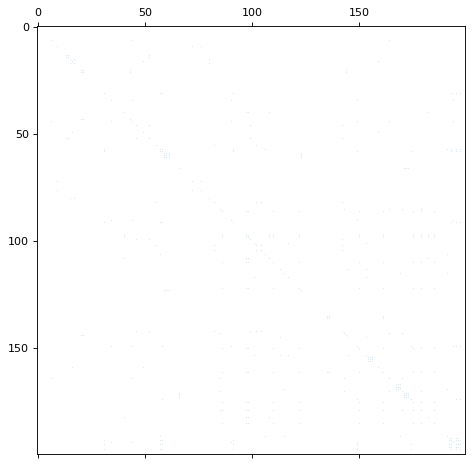

In [67]:
# Vidualize similarity between books
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6), dpi=80)
plt.spy(book_cosine_sim, precision = 0.1, markersize = 0.04)
plt.tight_layout()
plt.show()


---
### Recommendation
- Given a book name, find top n similar books based on cosine similarity score.
1) Series Information
2) Other Books In Numbered Series
3) Theme
4) Author

In [68]:
books = pd.Series(model_data['Name'])

def recommend_books_similar_to(book_name, n=5, cosine_sim_mat=book_cosine_sim):
    # get index of the imput book
    input_idx = books[books == book_name].index[0]   
    # Find top n similar books with decreasing order of similarity score
    top_n_books_idx = list(pd.Series(cosine_sim_mat[input_idx]).sort_values(ascending = False).iloc[1:n+1].index)
    # [1:6] to exclude 0 (index 0 is the input movie itself)
    
    books_list = list(books)
    recommended_books = [books[i] for i in top_n_books_idx]
        
    return recommended_books

In [73]:
def recommend_bookIDs_similar_to(book_name, n=5, cosine_sim_mat=book_cosine_sim):
    # Get index of the input book
    input_idx = books[books == book_name].index[0]   
    
    # Find top n similar books with decreasing order of similarity score
    top_n_books_idx = list(pd.Series(cosine_sim_mat[input_idx]).sort_values(ascending=False).iloc[1:n+1].index)
    
    # Create a list of recommended book IDs
    recommended_ids = model_data['Id'].iloc[top_n_books_idx].tolist()
    
    return recommended_ids

In [72]:
# Recommendations with series information
print("\033[1m{}\033[0m".format("Recommendation (Series Information) based on the read: baby's little engine that could)"))
display(recommend_books_similar_to("baby's little engine that could", 5))


Recommendation (Series Information) based on the read: baby's little engine that could)


["baby's little engine that could",
 'the wonderful thing about hiccups',
 "cliffsnotes on rand's atlas shrugged",
 'the language of recovery: a blue mountain arts collection ("language of ... " series)',
 'the warrior lives (guardians of the flame #5)']

In [74]:
# Recommendations with series information
print("\033[1m{}\033[0m".format("Recommendation (Series Information) based on the read: baby's little engine that could)"))
display(recommend_bookIDs_similar_to("baby's little engine that could", 5))


Recommendation (Series Information) based on the read: baby's little engine that could)


[1100074, 1100230, 1100101, 1100412, 1100379]

In [70]:
# Recommendations with series information
print("\033[1m{}\033[0m".format("Recommendation (Series Information) based on the read: bright hunger)"))
display(recommend_books_similar_to("bright hunger", 5))


Recommendation (Series Information) based on the read: bright hunger)


["perrine's sound and sense: an introduction to poetry",
 'the penguin book of victorian verse',
 'carolina ghost woods: poems',
 'changing light at sandover, the: a poem',
 'james merrill and w.h. auden: homosexuality and poetic influence']